In [1]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
%matplotlib notebook

In [108]:
root_path = '/archive/aes/projects/offline_online_comparison/'
static_path = root_path + 'ocean_annual.static.nc'
woa09_path = root_path + 'bling_offline_woa09/ocean_bling.0100.0171.5day.nc'
online_path = '/archive/jpd/mdt/20170403/ESM4Cp_1850_Control_am4g11r11_OMp5_ePBLn_bling7_burial/gfdl.ncrc3-intel15-prod-openmp/pp/ocean_bling_z/av/annual_5yr/ocean_bling_z.0056-0060.ann.nc'
data_path = '/local2/home/inputs/bling/woa13_all_o_annual_01.nc'
geolat = Dataset(static_path).variables['geolat'][:,:]
geolon = Dataset(static_path).variables['geolon'][:,:]
lat = Dataset(static_path).variables['yh'][:]
lon = Dataset(static_path).variables['xh'][:]
area = Dataset(static_path).variables['areacello'][:,:]
z = Dataset(online_path).variables['z_l'][:]
z_data = Dataset(data_path).variables['depth'][:]
lat_data = Dataset(data_path).variables['lat'][:]
lon_data = Dataset(data_path).variables['lon'][:]

In [107]:
o2_online = Dataset(online_path).variables['o2'][:,:,:,:].squeeze()
o2_offline = Dataset(woa09_path).variables['o2'][55:59,:,:,:].mean(axis=0).squeeze()
o2_data = Dataset(data_path).variables['o_an'][:,:,:,:].squeeze()
dic_online = Dataset(online_path).variables['dic'][:,:,:,:].squeeze()
dic_offline = Dataset(woa09_path).variables['dic'][55:59,:,:,:].mean(axis=0).squeeze()
chl_online = Dataset(online_path).variables['chl'][:,0,:,:].squeeze()
chl_offline = Dataset(woa09_path).variables['chl'][55:59,0,:,:].mean(axis=0).squeeze()


In [100]:
def plot_global_surface(ax,data,vmin=0,vmax=1,interval=5):
    m = Basemap(projection='eck4',lon_0=(-300+60)/2,resolution='c')
    m.drawcoastlines()
    m.fillcontinents(color='gray')
    m.drawparallels(np.arange(-90,120,30))
    m.drawmeridians(np.arange(0,380,60))
    x,y = m(geolon,geolat)
    mesh_ax = ax.pcolormesh(x,y,data,vmin=vmin,vmax=vmax);
    #m.contour(x,y,data,np.linspace(vmin,vmax,interval),colors='black');
    return mesh_ax

<IPython.core.display.Javascript object>


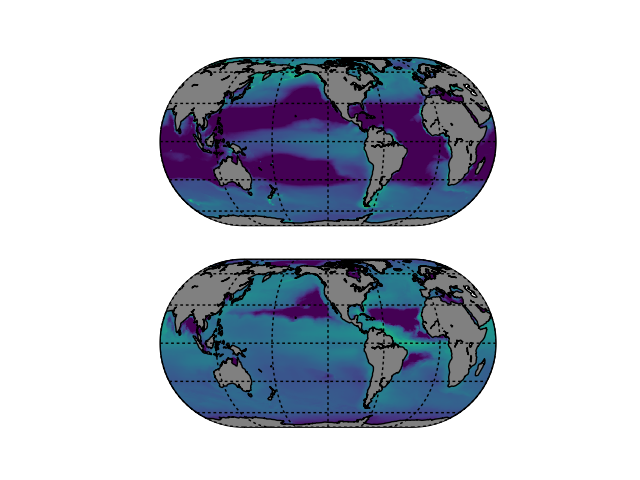

/local/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/local/home/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/local/home/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


In [101]:
fig = plt.figure()
ax = plt.subplot(2,1,1)
plot_global_surface(ax,np.log10(chl_online),np.log10(0.03),np.log10(30),10);
ax = plt.subplot(2,1,2)
plot_global_surface(ax,np.log10(chl_offline),np.log10(0.03),np.log10(30),10);

In [110]:
def plot_meridional(ax,z,data,vmin,vmax,nlevel,lat=lat):
    mesh_ax = ax.pcolormesh(lat,z,data,vmin=vmin,vmax=vmax);    
    ax.contour(lat,z,data,np.linspace(vmin,vmax,nlevel),colors='black',ls='solid');    
    ax.set_xlim((-60,60))
    ax.set_xticks(np.arange(-60,70,20))
    ax.set_ylim((0,1500))
    ax.invert_yaxis()
    ax.grid(ls='dotted')
    return mesh_ax

<IPython.core.display.Javascript object>


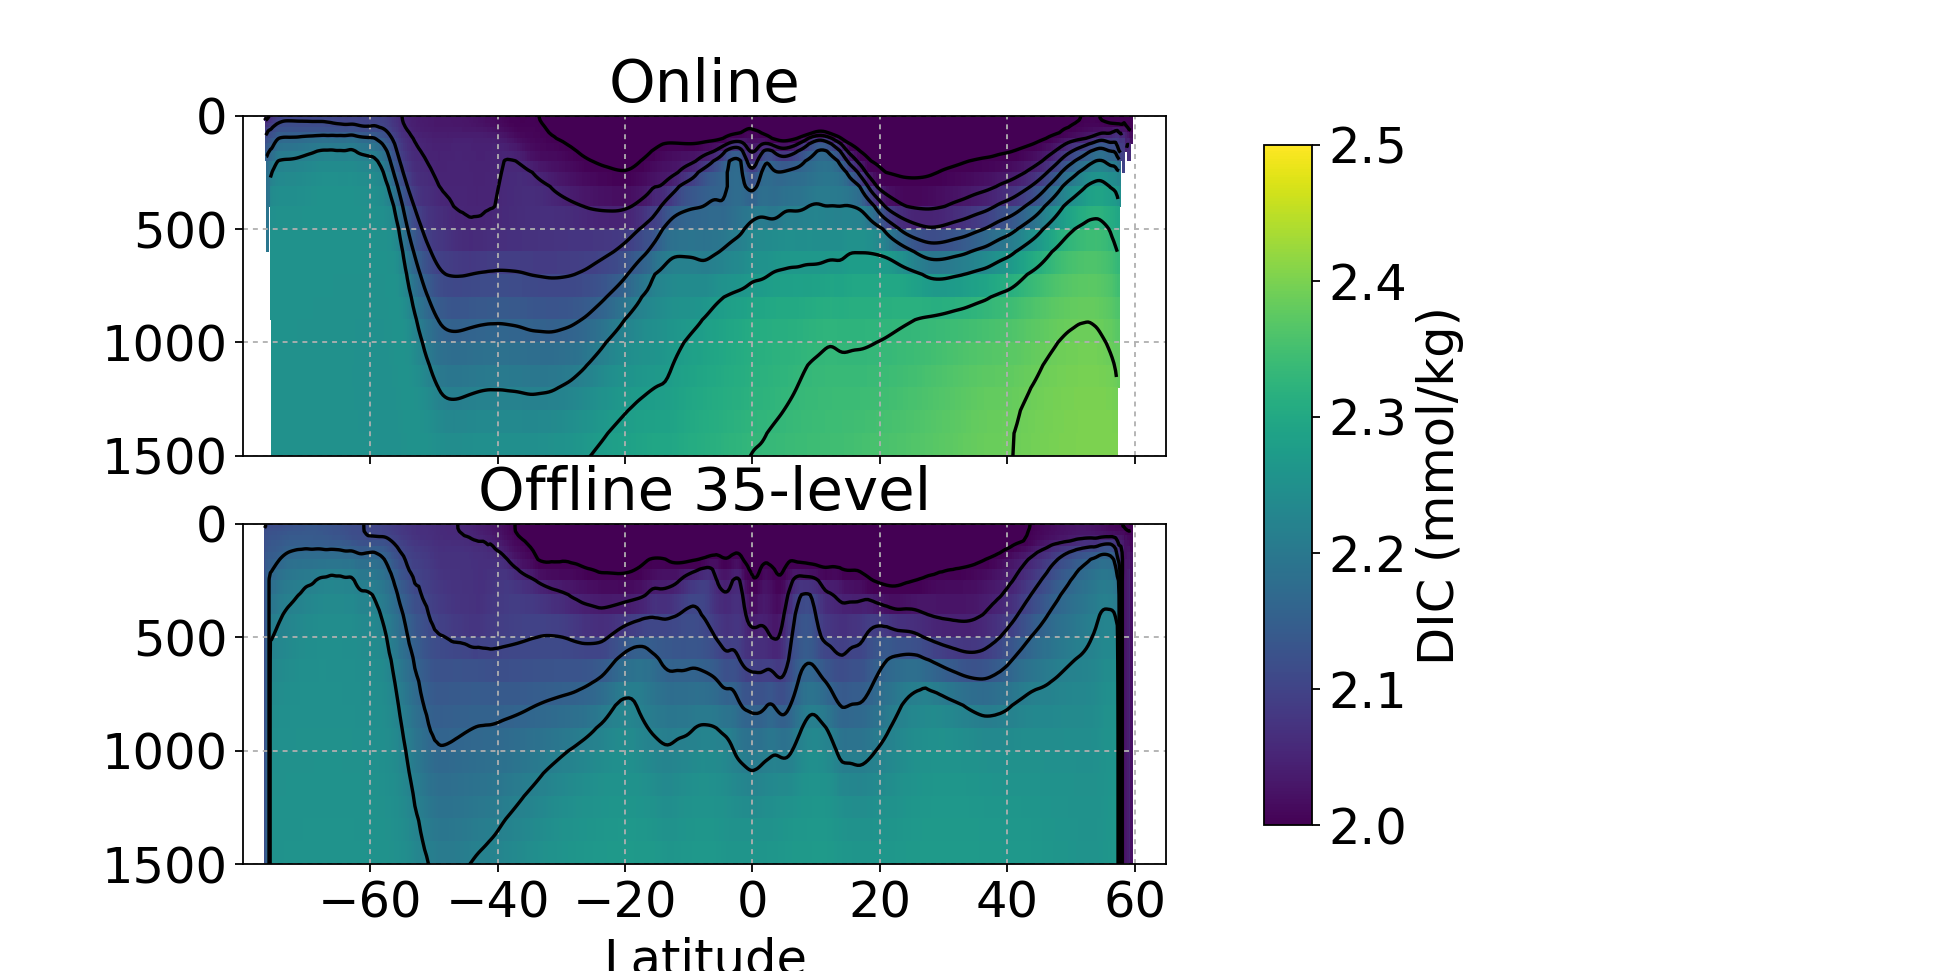

In [149]:
rcParams.update({'font.size': 22})
plotlon = -150
lonidx = np.argmin(np.abs(lon-plotlon))
scale = 1000
minval = 0.002
maxval = 0.0025
fig = plt.figure(figsize=(12,6))
#fig = plt.figure()
ax = plt.subplot(2,1,1)
plt.title('Online')
plot_meridional(ax,z,dic_online[:,:,lonidx]*scale,minval*scale,maxval*scale,10); 
ax.set_xlim((-80,65))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax = plt.subplot(2,1,2)
plt.title('Offline 35-level')
mesh_ax = plot_meridional(ax,z,dic_offline[:,:,lonidx]*scale,minval*scale,maxval*scale,10); 
ax.set_xlim((-80,65))
ax.set_xlabel('Latitude')

fig.subplots_adjust(hspace=0.2,right=0.6)
cax = fig.add_axes([0.65, 0.15, 0.025, 0.7])
fig.colorbar(mesh_ax, cax=cax,ticks = np.linspace(minval*scale,maxval*scale,6))
cax.set_ylabel('DIC (mmol/kg)')

In [ ]:
rcParams.update({'font.size': 22})
plotlon = -150
lonidx = np.argmin(np.abs(lon-plotlon))
maxo2 = 0.0003
fig = plt.figure(figsize=(9,12))
ax = plt.subplot(2,1,1)
plt.title('Online')
plot_meridional(ax,z,o2_online[:,:,lonidx]*1000,0,maxo2*1000,10); 
ax.set_xlim((-65,65))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax = plt.subplot(2,1,2)
plt.title('Offline 35-level')
mesh_ax = plot_meridional(ax,z,o2_offline[:,:,lonidx]*1000,0,maxo2*1000,10); 
ax.set_xlim((-65,65))
ax.set_xlabel('Latitude')

fig.subplots_adjust(hspace=0.2,right=0.6)
cax = fig.add_axes([0.65, 0.15, 0.025, 0.7])
fig.colorbar(mesh_ax, cax=cax,ticks = np.linspace(0,maxo2*1000,13))
cax.set_ylabel('O2 (years)')